**OCR Digitizer**

# refer back to these for predicions
- [sas2412_ADL_hw2_1.ipynb](https://colab.research.google.com/drive/14vNo8WBIDMAQ9InRQUTtCMVuEmzJTuv2)

- [sas2412_ADL_hw4.ipynb](https://colab.research.google.com/drive/1x46w0H4u6TuSaz2BmYMao-wxtOy8gLu3#scrollTo=7UjofD4EQSiM)

The goal of this project is to automate the digitization of Cairo Geniza

In [22]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import metrics
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
import pandas as pd
import csv
from datetime import datetime


import cv2
import imutils

import numpy as np
import pathlib
import os


2.8.0


In [ ]:
# !unzip "archive.zip"
!unzip -q "heb_dataset.zip"

In [2]:
idx_to_letter = {(i-ord("א")):chr(i) for i in range(ord('א'), ord("ת")+1)}

In [ ]:
# letters_df = pd.read_csv('A_Z Handwritten Data.csv')
# letters_df

# for i in range(10):
#   x  = letters_df.loc[i][1:].values.reshape((28,28))
#   label = letters_df.loc[i][0]
#   print(label)
#   plt.imshow(x)
#   plt.show()

In [ ]:
# Your code here
def csv_to_data_and_label(filename):

  with open(filename) as myfile:
    labels = []
    imgs = []

    reader = csv.reader(myfile, delimiter=',')
    for row in reader:
      labels.append(int(row[0]))
      img = np.array(row[1:], dtype=np.uint8)
      img = img.reshape((28,28))
      imgs.append(img)

    imgs = np.array(imgs)
    labels = np.array(labels)

    return labels, imgs

# labels, imgs = csv_to_data_and_label('archive/A_Z Handwritten Data.csv')

In [ ]:
def get_label(path_name, offset=0):
  start_i = path_name.rfind('/')+1
  end_i = path_name.find('_')
  label = int(path_name[start_i:end_i])
  label -= offset
  return label

def load_glyph_img(path_name):

  img = tf.io.read_file(path_name)
  img = tf.image.decode_png(img, channels=3)
  img = tf.image.rgb_to_grayscale(img)
  img = tf.squeeze(img)
  img = tf.cast(img, tf.float32)
  img /= 255.0  # normalize pixels to 0,1

  return img

def load_glyphs(path):

  imgs = []
  labels = []
  for path_name in  os.listdir(path):
    if 'png' in path_name:
      img = load_glyph_img(path+path_name)
      label = get_label(path_name, offset=ord('א'))

      imgs.append(img)
      labels.append(label)

  imgs = np.array(imgs)
  labels = np.array(labels)

  return labels, imgs


labels, imgs = load_glyphs("heb_dataset/")


In [ ]:
from sklearn.model_selection import train_test_split
train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgs, labels)  
# train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0

# train_imgs_ds = tf.data.Dataset.from_tensor_slices(train_imgs)
# train_labels_ds = tf.data.Dataset.from_tensor_slices(train_labels)
# train_ds = tf.data.Dataset.zip((train_imgs_ds, train_labels_ds))
# train_ds = train_ds.batch(16)

train_imgs = tf.expand_dims(train_imgs, 3)
test_imgs = tf.expand_dims(test_imgs, 3)

train_datagen = ImageDataGenerator(
      # rotation_range=3,
      # width_shift_range=0.1,
      # height_shift_range=0.1,
      # shear_range=0.5,
      # zoom_range=0.2,
      # fill_mode='nearest'
      )

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(train_imgs, train_labels, shuffle=True, batch_size=16)
test_generator = train_datagen.flow(test_imgs, test_labels, batch_size=16)


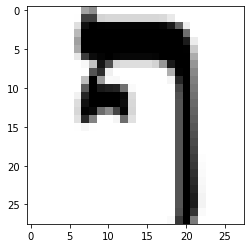

19
ף


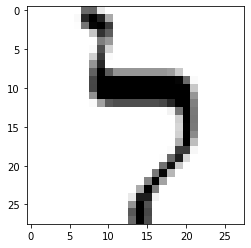

12
ל


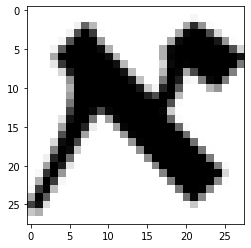

0
א


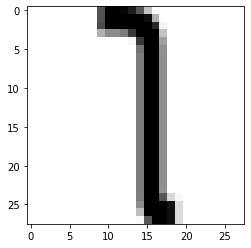

15
ן


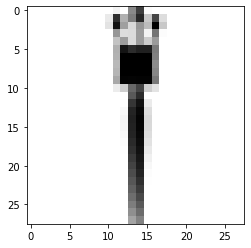

15
ן


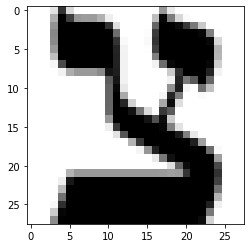

22
צ


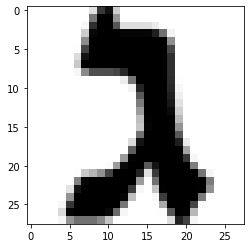

2
ג


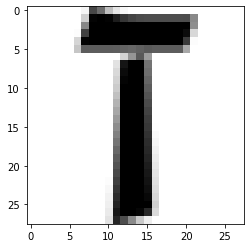

6
ז


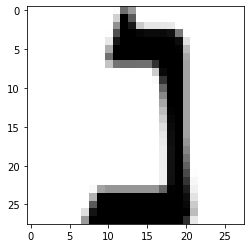

16
נ


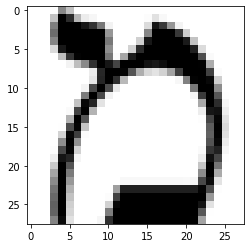

14
מ


In [ ]:
# for img, lab in train_ds.take(15):
#   plt.imshow(img[0], plt.get_cmap('gray'))
#   plt.show()
#   print(lab[0])
#   print(idx_to_letter[int(lab[0])])

for img_batch, lab_batch in train_generator:
  for i in range(10):
    # plt.imshow(img_batch[0], plt.get_cmap('gray'))
    img = img_batch[i].squeeze(2)
    plt.imshow(img, plt.get_cmap('gray'))
    plt.show()

    print(lab_batch[i])
    print(idx_to_letter[int(lab_batch[i])])
  break

# Create and train model

In [ ]:
# # transfer learning for small hebrew dataset
# base_model = tf.keras.applications.InceptionResNetV2(
#     input_shape = (75,75,3),
#     include_top=False,
#     weights="imagenet")

# base_model.trainable = False 
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# prediction_layer = tf.keras.layers.Dense(27, activation='softmax')

# model = tf.keras.Sequential([
#   base_model,
#   global_average_layer,
#   prediction_layer
# ])


# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])


# history = model.fit(train_generator, validation_data=test_generator, epochs=5,
#           steps_per_epoch=train_generator.n//train_generator.batch_size,
#           validation_steps=test_generator.n//test_generator.batch_size)

Epoch 1/15
54/54 [==============================] - 12s 10ms/step - loss: 2.0767 - accuracy: 0.4133 - val_loss: 0.7426 - val_accuracy: 0.7569
Epoch 2/15
54/54 [==============================] - 0s 6ms/step - loss: 0.5141 - accuracy: 0.8337 - val_loss: 0.4711 - val_accuracy: 0.8611
Epoch 3/15
54/54 [==============================] - 0s 6ms/step - loss: 0.2468 - accuracy: 0.9145 - val_loss: 0.4061 - val_accuracy: 0.8646
Epoch 4/15
54/54 [==============================] - 0s 6ms/step - loss: 0.1792 - accuracy: 0.9461 - val_loss: 0.3541 - val_accuracy: 0.9062
Epoch 5/15
54/54 [==============================] - 0s 6ms/step - loss: 0.1551 - accuracy: 0.9532 - val_loss: 0.4208 - val_accuracy: 0.8889
Epoch 6/15
54/54 [==============================] - 0s 5ms/step - loss: 0.0902 - accuracy: 0.9707 - val_loss: 0.4033 - val_accuracy: 0.8958
Epoch 7/15
54/54 [==============================] - 0s 5ms/step - loss: 0.0851 - accuracy: 0.9754 - val_loss: 0.4192 - val_accuracy: 0.9097
Epoch 8/15
54/54 [

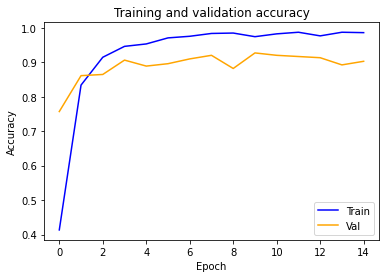

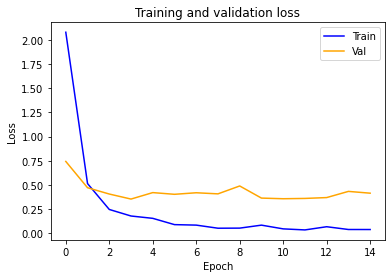

In [ ]:
# model = tf.keras.models.Sequential([
#   keras.Input(shape=(28, 28, 1)),
#   keras.layers.Flatten(input_shape=(28, 28)),
#   keras.layers.Dense(128, activation='relu'),
#   keras.layers.Dense(128, activation='relu'),
#   keras.layers.Dense(27, activation='softmax')
# ])
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dense(27, activation='softmax')
    ]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# history = model.fit(train_ds, validation_data=(test_imgs, test_labels), epochs=10)
history = model.fit(train_generator, validation_data=test_generator, epochs=15,
          steps_per_epoch=train_generator.n//train_generator.batch_size,
          validation_steps=test_generator.n//test_generator.batch_size)
# A plotting function you can reuse
def plot(history, save=True):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  fig1 = plt.figure()
  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  fig2 = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  if save:
    timestamp = datetime.now().strftime('%Y%m%d_%I.%M.%S %p')
    fig1.savefig(f'acc_graph_{timestamp}.png')
    fig2.savefig(f'loss_graph_{timestamp}.png')


  # model.save("/content/ocr_model_english.h5")
  model.save("/content/ocr_model_hebrew.h5")




plot(history)
from google.colab import files
# files.download("/content/ocr_model_english.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# model = keras.models.load_model("/content/ocr_model_english.h5")
model = keras.models.load_model("/content/ocr_model_hebrew.h5")

TypeError: ignored

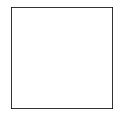

In [ ]:
predictions = model.predict(test_imgs)
pred_idxs = np.argmax(predictions, axis=1)

# picks random correct prediction
correct_pred = np.random.choice(np.where(pred_idxs==test_labels)[0]) 

# picks a random incorrect prediction
wrong_pred = np.random.choice(np.where(pred_idxs!=test_labels)[0])

# Image display sourced from https://www.tensorflow.org/tutorials/keras/classification
plt.figure(figsize=(4,4))
for i, img_idx in enumerate([correct_pred, wrong_pred]):
  plt.subplot(1,2,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_imgs[img_idx], cmap=plt.cm.binary)
  if pred_idxs[img_idx]==test_labels[img_idx]:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("Image index: {}\n" \
             "{:2.0f}% confidence {}\n" \
             "ground truth: {}".format(img_idx,max(predictions[img_idx])*100, 
              pred_idxs[img_idx], test_labels[img_idx]), color=color)

plt.show()
print(idx_to_letter)

In [ ]:
!unzip enlish_test_imgs.zip

Archive:  enlish_test_imgs.zip
   creating: enlish_test_imgs/
  inflating: enlish_test_imgs/DDDDDDD.png  
  inflating: __MACOSX/enlish_test_imgs/._DDDDDDD.png  
  inflating: enlish_test_imgs/dddddd.png  
  inflating: __MACOSX/enlish_test_imgs/._dddddd.png  
  inflating: enlish_test_imgs/.DS_Store  
  inflating: __MACOSX/enlish_test_imgs/._.DS_Store  
  inflating: enlish_test_imgs/SSSSSSSS.png  
  inflating: __MACOSX/enlish_test_imgs/._SSSSSSSS.png  
  inflating: enlish_test_imgs/TTTTTT.png  
  inflating: __MACOSX/enlish_test_imgs/._TTTTTT.png  
  inflating: enlish_test_imgs/EEEEEEE.png  
  inflating: __MACOSX/enlish_test_imgs/._EEEEEEE.png  
  inflating: enlish_test_imgs/eeeee.png  
  inflating: __MACOSX/enlish_test_imgs/._eeeee.png  


In [ ]:
!ls enlish_test_imgs

DDDDDDD.png  dddddd.png  EEEEEEE.png  eeeee.png  SSSSSSSS.png  TTTTTT.png


In [ ]:
# !rm -rf enlish_test_imgs

In [ ]:
base_dir = 'enlish_test_imgs/'
data_root = pathlib.Path(base_dir)
all_image_paths = list(data_root.glob('*'))
all_image_paths = [str(path) for path in all_image_paths if path.name[0]!='.']
all_image_paths

['enlish_test_imgs/eeeee.png',
 'enlish_test_imgs/EEEEEEE.png',
 'enlish_test_imgs/DDDDDDD.png',
 'enlish_test_imgs/SSSSSSSS.png',
 'enlish_test_imgs/TTTTTT.png',
 'enlish_test_imgs/dddddd.png']

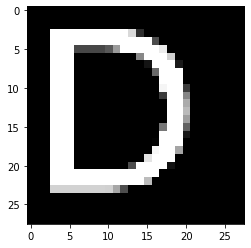

In [ ]:
base_dir = 'enlish_test_imgs/'
data_root = pathlib.Path(base_dir)
all_image_paths = list(data_root.glob('*'))
all_image_paths = [str(path) for path in all_image_paths if path.name[0]!='.']

IMG_SIZE = 28

def load_and_preprocess_image(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_png(img, channels=3)
  img = tf.image.rgb_to_grayscale(img)
  img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
  img = tf.squeeze(img)
  img /= 255.0  # normalize pixels to 0,1
  img = 1-img # invert colors

  return img

img = load_and_preprocess_image(all_image_paths[2])
plt.imshow(img, plt.get_cmap('gray'))
# img.shape

In [ ]:
# test_imgs[0]

In [ ]:
all_image_paths

['enlish_test_imgs/TTTTTT.png',
 'enlish_test_imgs/eeeee.png',
 'enlish_test_imgs/EEEEEEE.png',
 'enlish_test_imgs/dddddd.png',
 'enlish_test_imgs/SSSSSSSS.png',
 'enlish_test_imgs/DDDDDDD.png']

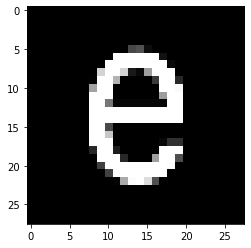

Prediction:   Z 0.89914113


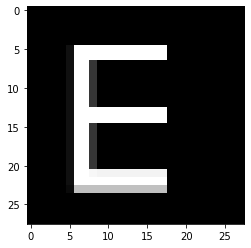

Prediction:   E 1.0


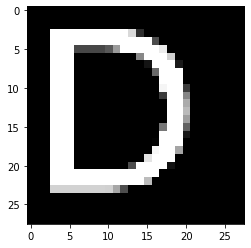

Prediction:   B 0.68828213


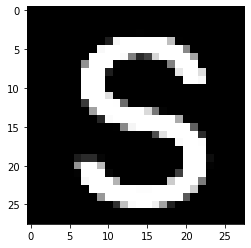

Prediction:   S 0.99980086


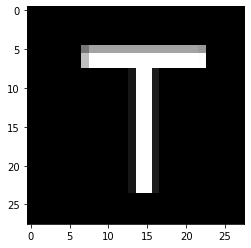

Prediction:   T 0.9999993


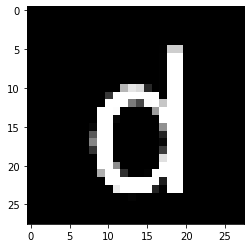

Prediction:   B 0.96612275


In [ ]:
for img in all_image_paths:

  img = load_and_preprocess_image(img)
  plt.imshow(img, plt.get_cmap('gray'))
  plt.show()

  img = tf.expand_dims(img, axis=0) # add 1

  pred = model.predict(img)
  pred_idx = np.argmax(pred, axis=1)[0]
  print("Prediction:  ", idx_to_letter[pred_idx], np.max(pred))



In [ ]:
idx_to_letter

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [ ]:
# TODO
# - maybe add data augmentation

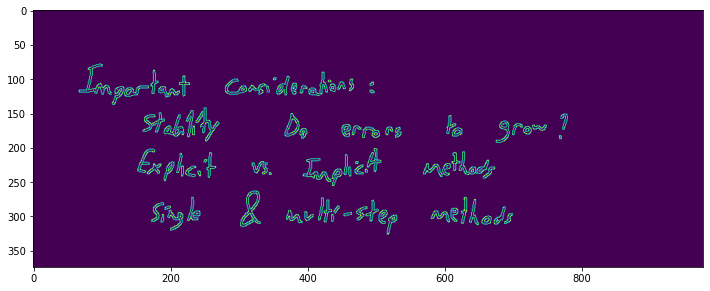

In [ ]:
import cv2
import imutils

# https://stackoverflow.com/questions/23506105/extracting-text-opencvz

# img2 = cv2.imread("/content/Screen Shot 2022-04-10 at 4.05.33 PM.png")
img2 = cv2.imread("small2.png")

img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

# not used with canny filter
# (thresh, img_bw) = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# print(thresh)

canny_ratio = 1
canny_threshold = 100
upper_canny_threshold = canny_threshold*canny_ratio
img_canny = cv2.Canny(img_blur, canny_threshold, upper_canny_threshold)

# out = cv2.findContours(img_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
out = cv2.findContours(img_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


plt.figure(figsize=(12,12))
plt.imshow(img_canny)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


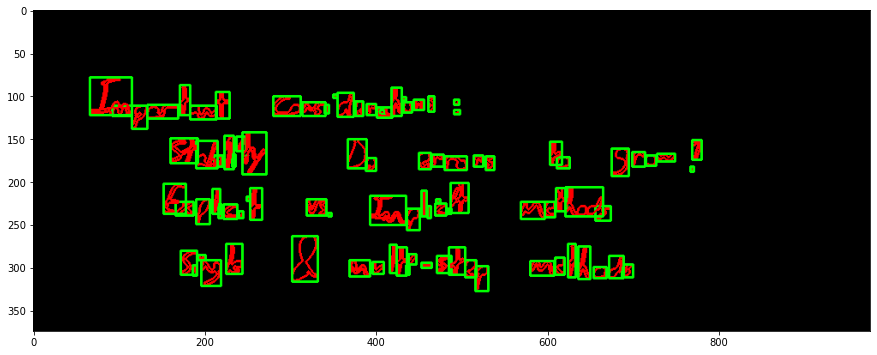

In [ ]:
img2 = cv2.imread("small2.png")

img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# grad = cv2.morphologyEx(img_blur, cv2.MORPH_GRADIENT, kernel)

# not used with canny filter
# (thresh, img_bw) = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# print(thresh)

canny_ratio = 4
canny_threshold = 100
upper_canny_threshold = canny_threshold*canny_ratio
img_canny = cv2.Canny(img_blur, canny_threshold, upper_canny_threshold)


# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 1))
# connected = cv2.morphologyEx(img_canny, cv2.MORPH_CLOSE, kernel)

out = cv2.findContours(img_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

bound_box_img = np.zeros(img2.shape)


for i in range(len(out[0])):
  # contr_img = img2.copy()
  x, y, w, h = cv2.boundingRect(out[0][i])

  # # cv2.putText(bound_box_img, "Rectangle", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
  # #             0.5, (0, 255, 255), 2)
  cv2.drawContours(bound_box_img, out[0][i], -1, (255, 0, 0), 2)
  cv2.rectangle(bound_box_img,(x,y),(x+w,y+h),(0,255,0),2)

plt.figure(figsize=(15,15))
plt.imshow(bound_box_img)



In [28]:
def get_words_by_line(cv2_img, english=True):
  canny_ratio = 4
  canny_threshold = 50
  upper_canny_threshold = canny_threshold*canny_ratio
  img_canny = cv2.Canny(cv2_img, canny_threshold, upper_canny_threshold)

  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 1))
  connected = cv2.morphologyEx(img_canny, cv2.MORPH_CLOSE, kernel)


  cntrs, hierarchy = cv2.findContours(connected, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  cntrs, median_h = remove_non_words_or_chars(cntrs)

  cntrs_by_line = sort_contrs_by_line(cntrs, english=english)
  return cntrs_by_line

def get_chars_from_word_comps(cv2_word_img, english=True):

  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,4))
  connected = cv2.dilate(cv2_word_img, kernel, iterations=3)
 
  canny_ratio = 4
  canny_threshold = 50
  upper_canny_threshold = canny_threshold*canny_ratio
  img_canny = cv2.Canny(connected, canny_threshold, upper_canny_threshold)
  
  cntrs, hierarchy = cv2.findContours(img_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  cntrs, median_h = remove_non_words_or_chars(cntrs, .4)
  bound_rects = np.array([cv2.boundingRect(cntr) for cntr in cntrs])

  bound_rects = sort_contrs_lr(bound_rects, english)

  return bound_rects, cntrs

def get_chars_from_word(bound_rect_of_word, img_blur_bw, im_src_bw, english=True, show_bound_rects_chars=False):
  x, y, w, h = bound_rect_of_word
  word_img = img_blur_bw[y:y+h, x:x+w]
  img_h, img_w = img_blur_bw.shape
  char_imgs_out = [word_img]

  bound_rects_chars_word, cntrs = get_chars_from_word_comps(word_img, english=english)

  if show_bound_rects_chars:
    show_bounds_rects_by_char(word_img, bound_rects_chars_word)

  for i in range(len(bound_rects_chars_word)):
    bound_rects_chars_word[i][0] += x
    bound_rects_chars_word[i][1] += y
    bound_rects_chars_word[i] = pad_char(bound_rects_chars_word[i], img_h, img_w, 1)

  for x1,y1,w1,h1 in bound_rects_chars_word:
    char_img = im_src_bw[y1:y1+h1, x1:x1+w1]
    char_img = resize_char(char_img)
    char_img = reshape_char_square(char_img)
    char_imgs_out.append(char_img)

  return char_imgs_out, bound_rects_chars_word

def pad_char(bound_rects_by_word, img_h, img_w, pad_amnt=3):
  x, y, w, h = bound_rects_by_word
  x = max(0, x-pad_amnt)
  y = max(0, y-pad_amnt)
  w = min(img_w, w+pad_amnt)
  h = min(img_h, h+pad_amnt)
  return x, y, w, h

def predict_char(model, idx_to_letter, img,  show_img=False):  

  img = tf.expand_dims(img, axis=0) # add 1
  img = 1-img
  pred = model.predict(img)
  pred_idx = np.argmax(pred, axis=1)[0]
  char_letter = idx_to_letter[pred_idx]
  
  if show_img:
    plt.imshow(tf.squeeze(img, axis=0), plt.get_cmap('gray'))
    plt.show()
    print("Prediction:  ", pred_idx , char_letter, np.max(pred))

  return char_letter
  
def preprocess_img_cv2(img_path, bw=False, thresh_level=55, no_blur=False):
  # read, gray and blur image
  cv2_img = cv2.imread(img_path)
  img_out = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY) # gray

  if bw:
    _ , img_out = cv2.threshold(img_out, thresh_level, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

  if not no_blur:
    img_out = cv2.GaussianBlur(img_out, (5, 5), 1)

  return img_out
  
def resize_char(char_img):
  char_h, char_w = char_img.shape
  if char_h > char_w:
    char_img = imutils.resize(char_img, height=28)
  else:
    char_img = imutils.resize(char_img, width=28)

  return char_img

def reshape_char_square(char_img):

  char_h, char_w = char_img.shape
  char_img = char_img.astype('float64')
  char_img /= 255.0  # normalize pixels to 0,1
  char_img = 1-char_img # invert colors
  rw_start = (28-char_h)//2
  cl_start = (28-char_w)//2

  square_char_img = np.zeros((28, 28))
  square_char_img[rw_start:(rw_start+char_h), cl_start:(cl_start+char_w)] =  char_img
  return square_char_img

def remove_non_words_or_chars(cntrs, h_multiple=.3):
  if len(cntrs)==0:
    return [], 0
  # removes small cntrs
  bound_rects = np.array([cv2.boundingRect(cntr) for cntr in cntrs])
  # w_thresh = .3*np.median(bound_rects[:,2])
  med_h = np.median(bound_rects[:,3])
  h_thresh = h_multiple*med_h
  h_max = 10*med_h
  filter_cntrs = []

  for i in range(len(bound_rects)):
    x, y, w, h = bound_rects[i]
    if w > 5  and h > h_thresh and h < h_max:
      filter_cntrs.append(cntrs[i])

  return filter_cntrs, med_h

def sort_contrs_lr(bound_rects, english=True):

  if len(bound_rects)<2:
    return bound_rects

  bound_rects = sorted(bound_rects, key=lambda x: x[0], reverse=(not english))

  return bound_rects


def sort_contrs_by_line(cntrs, english=True):
  bound_rects = np.array([cv2.boundingRect(cntr) for cntr in cntrs])
  median_h = np.median(bound_rects[:,3])
  line_h_offset = 2*median_h
  bound_rects = sorted(bound_rects, key=lambda x: x[1])
  curr_line_h = line_h_offset
  curr_line = 0
  bound_rects_by_line = [[]]

  for i in range(len(bound_rects)):
    if bound_rects[i][1] < curr_line_h: # bound_rects[i][1] == y

      bound_rects_by_line[curr_line].append(bound_rects[i])

    else: 
      # create new line
      bound_rects_by_line.append([])
      curr_line_h += line_h_offset
      curr_line += 1
      bound_rects_by_line[curr_line].append(bound_rects[i])


  for i in range(len(bound_rects_by_line)):
    bound_rects_by_line[i] = sort_contrs_lr(bound_rects_by_line[i], english)

  return  bound_rects_by_line


def show_bounds_rects_by_char(word_img, bound_rects_chars_word):
  # warning: need to fix function to account for padding
  # print("warning: need to fix function to account for padding")
  bound_box_img = word_img.copy()

  for i in range(len(bound_rects_chars_word)):

    x2, y2, w2, h2 =  bound_rects_chars_word[i]
    # cv2.drawContours(out_img, cntrs[i], -1, (255, 0, 0), 2)
    cv2.rectangle(bound_box_img, (x2,y2),(x2+w2,y2+h2),(0,255, 0),2)

  plt.figure(figsize=(10,5))
  plt.imshow(bound_box_img)

def show_char_imgs(char_imgs, hide_word_img=False):
  for i in range(len(char_imgs_out)):
    if i == 0:
      if hide_word_img:
        continue
      plt.figure(figsize=(10,5))
    else:
      plt.figure(figsize=(3,3))
    plt.imshow(char_imgs_out[i])

def show_bounds_rects_by_word(bound_rects_by_line,img_blur):
  # bound_box_img = np.zeros((*img_blur.shape,3))
  bound_box_img = img_blur.copy()


  i = 1
  for row in range(len(bound_rects_by_line)):
    for word_i in range(len(bound_rects_by_line[row])):

      x, y, w, h =  bound_rects_by_line[row][word_i]

      cv2.putText(bound_box_img, f"{i}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                  1, (0, 255, 255), 2)
      cv2.rectangle(bound_box_img,(x,y),(x+w,y+h),(0,255,0),2)
      i+=1

  plt.figure(figsize=(15,15))
  plt.imshow(bound_box_img)

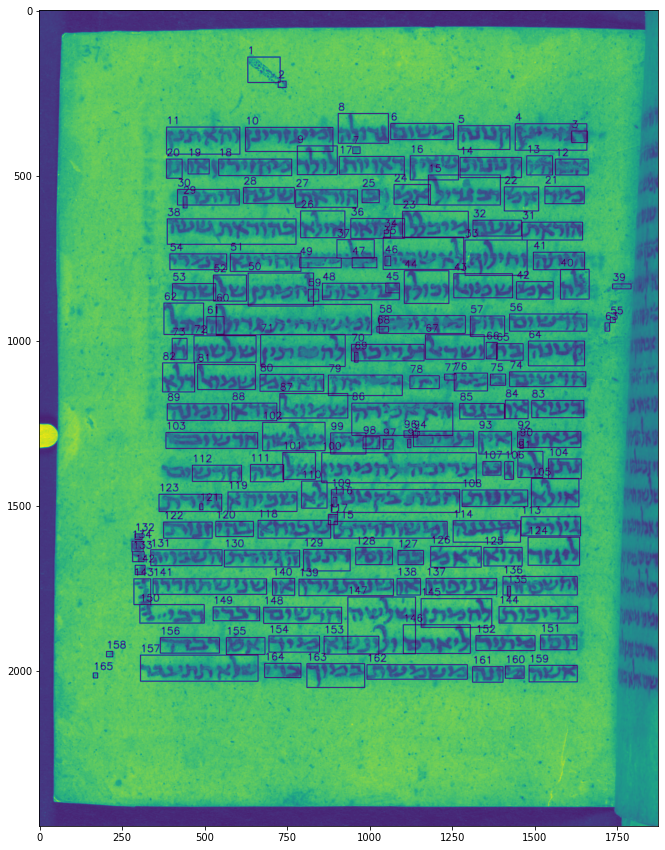

In [29]:
img_path = "ancient_img1.jpeg"
# img_path = "ancient_img2.png"
# img_path = "ancient_img4.jpeg"


img_blur = preprocess_img_cv2(img_path) # for lines and words
img_blur_bw = preprocess_img_cv2(img_path, bw=True, thresh_level=55) # for chars
img_src_bw = preprocess_img_cv2(img_path, no_blur=True) # for char_img
img_raw = cv2.imread(img_path)

bound_rects_by_line =  get_words_by_line(img_blur, english=False)

show_bounds_rects_by_word(bound_rects_by_line, img_blur)

# below for debbugging (less dilation)

In [20]:
def get_chars_from_word_comps(cv2_word_img, english=True):

  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,4))
  connected = cv2.dilate(cv2_word_img, kernel, iterations=1)
  plt.imshow(connected)
  plt.show()
  canny_ratio = 4
  canny_threshold = 50
  upper_canny_threshold = canny_threshold*canny_ratio
  img_canny = cv2.Canny(connected, canny_threshold, upper_canny_threshold)
  plt.imshow(img_canny)
  plt.show()
  cntrs, hierarchy = cv2.findContours(img_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  cntrs, median_h = remove_non_words_or_chars(cntrs, .4)
  bound_rects = np.array([cv2.boundingRect(cntr) for cntr in cntrs])

  bound_rects = sort_contrs_lr(bound_rects, english)

  return bound_rects, cntrs

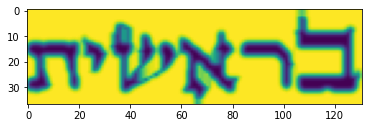

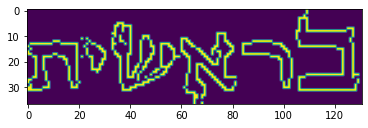

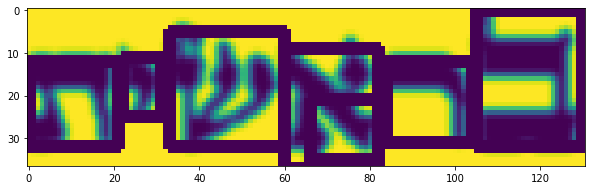

ברהאשית


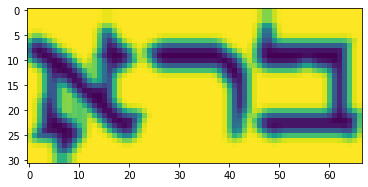

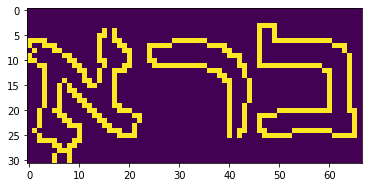

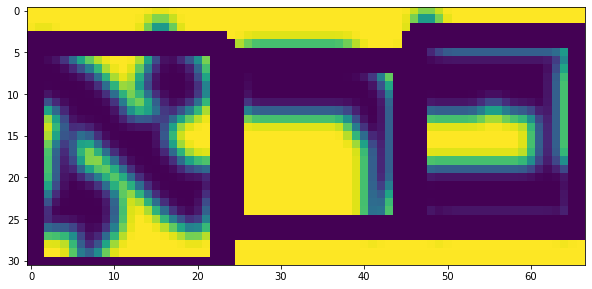

ברא


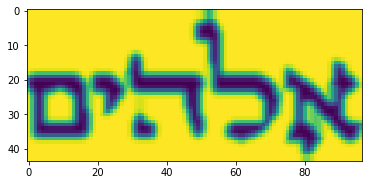

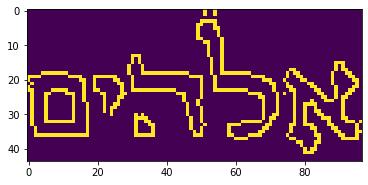

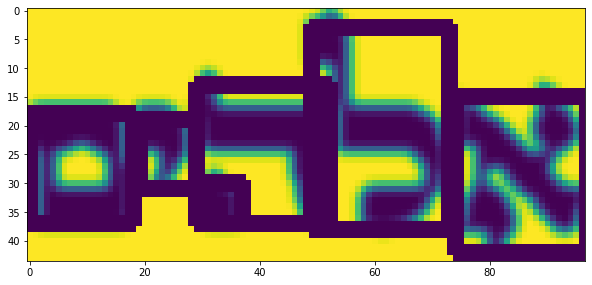

אליהים


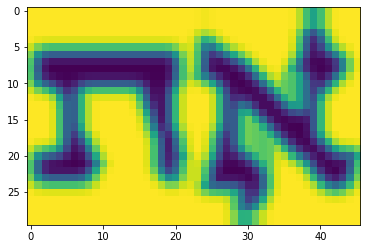

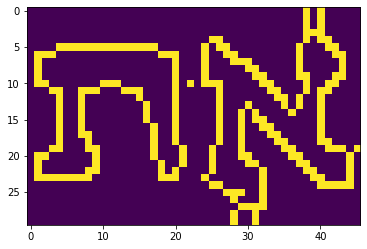

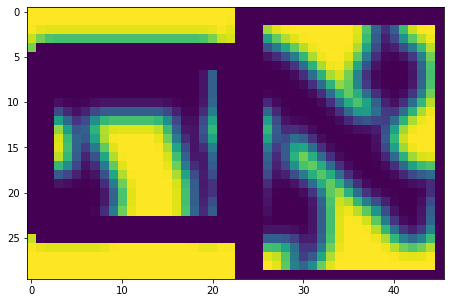

את


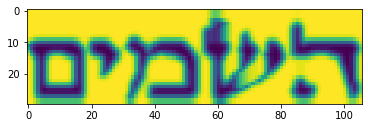

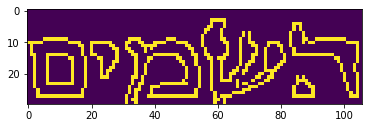

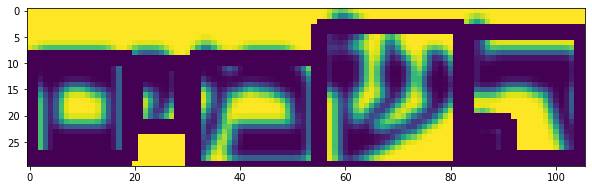

יהשמים


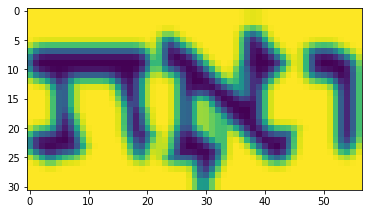

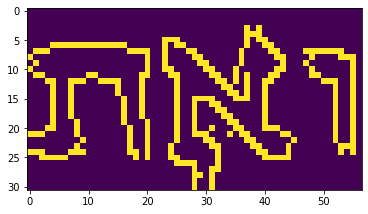

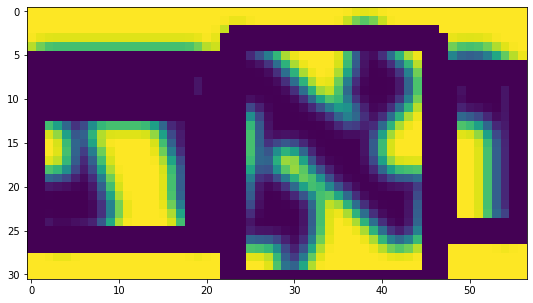

ואהת


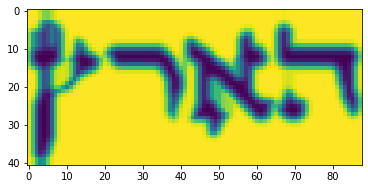

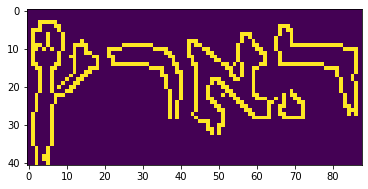

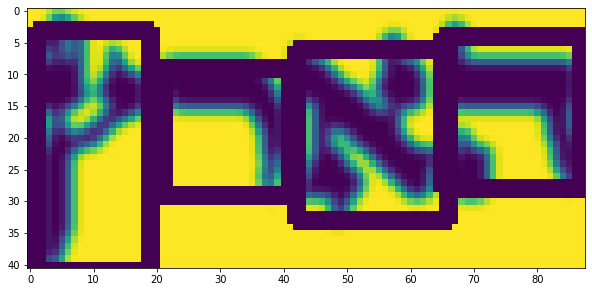

תארץ


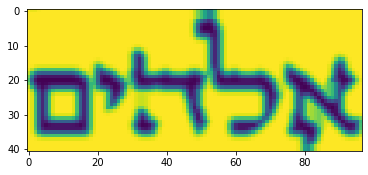

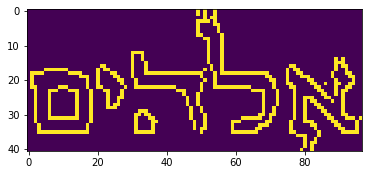

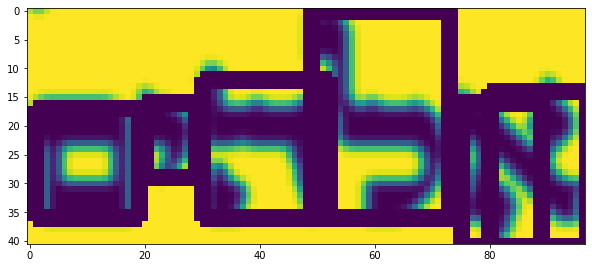

אילהים


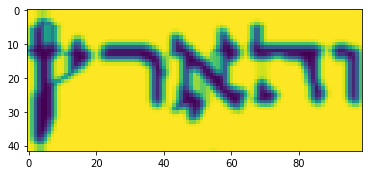

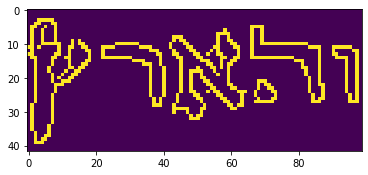

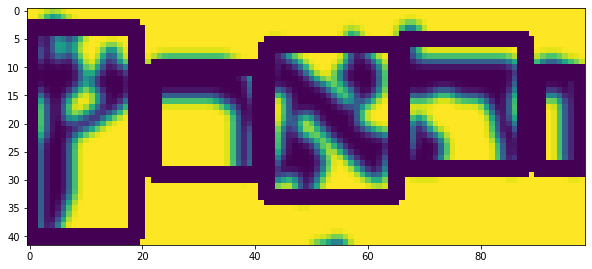

והארץ


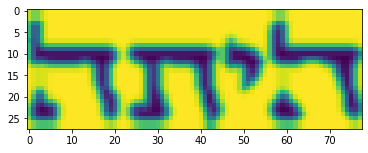

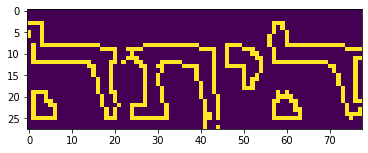

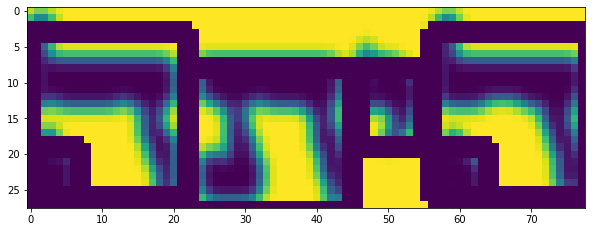

יתיתיה


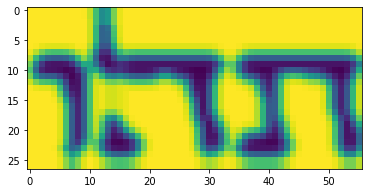

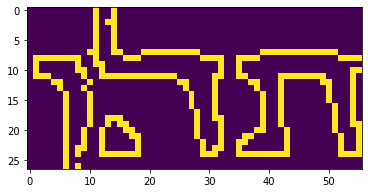

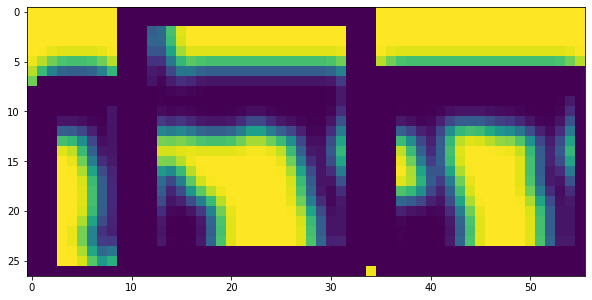

תהו


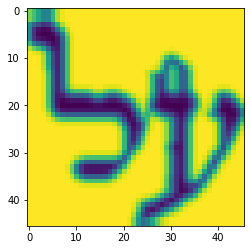

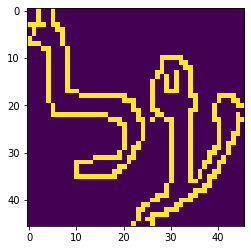

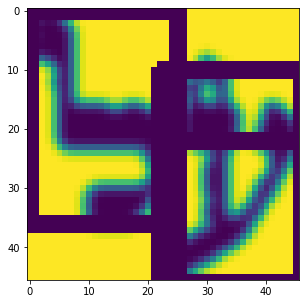

עעל


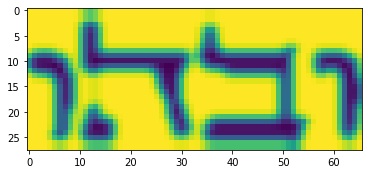

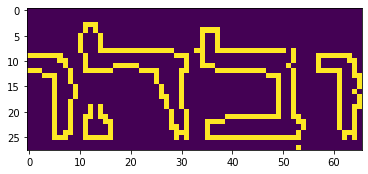

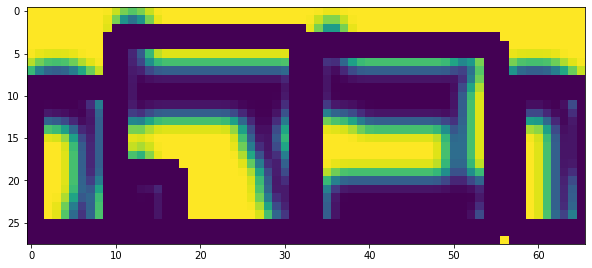

וביתו


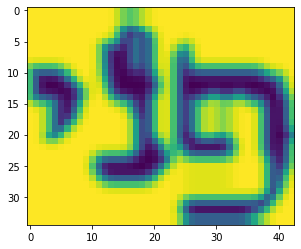

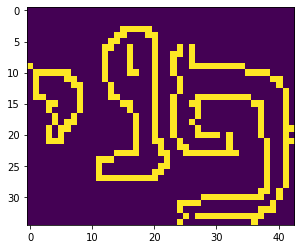

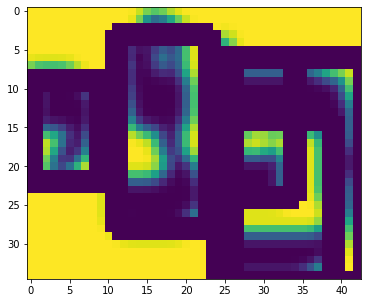

פטיני


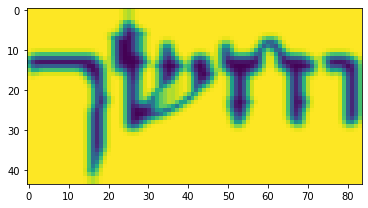

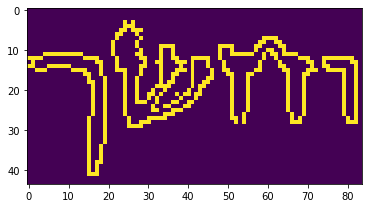

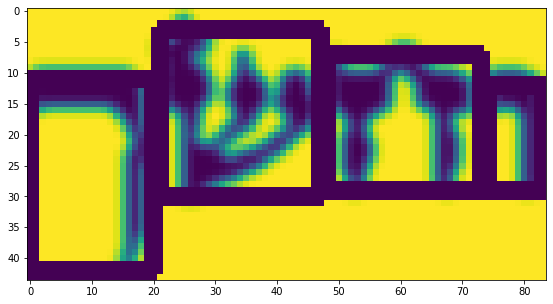

וחשך


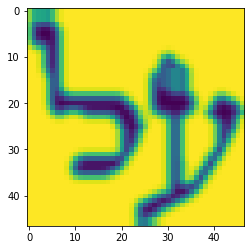

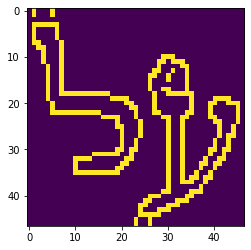

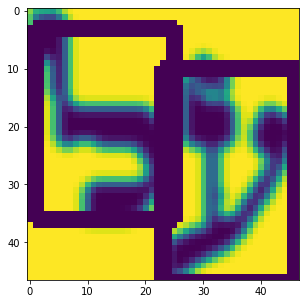

על


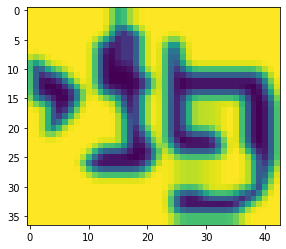

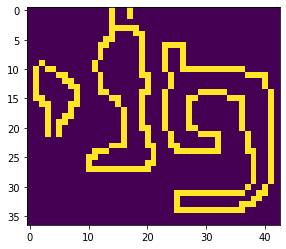

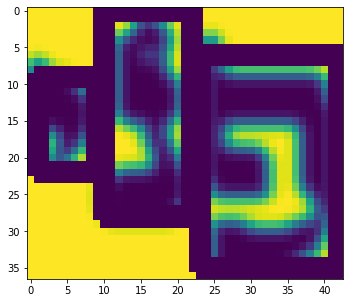

יני


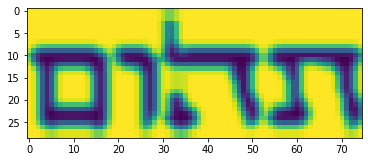

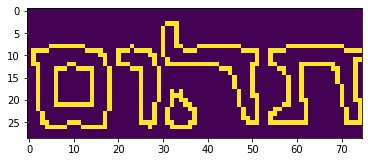

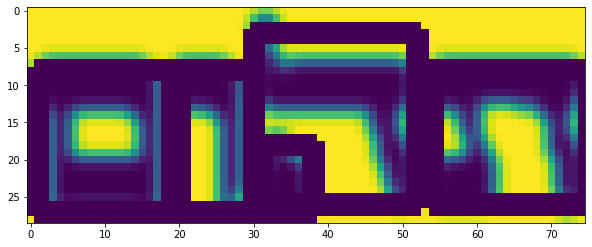

תיהוס


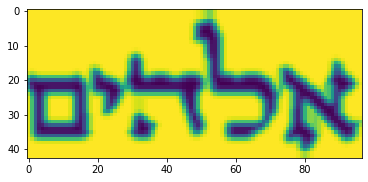

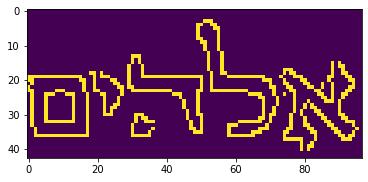

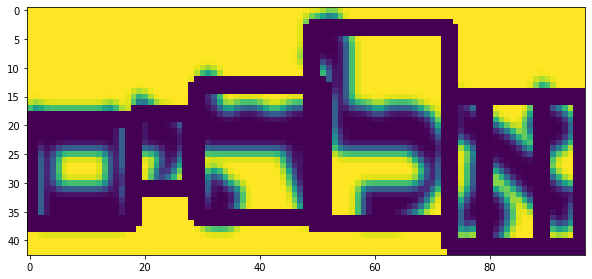

אילהים


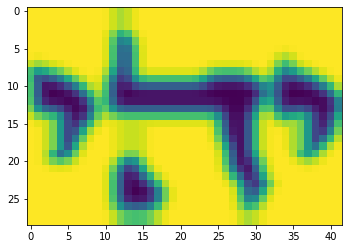

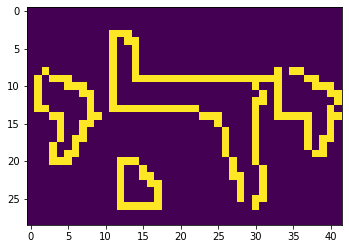

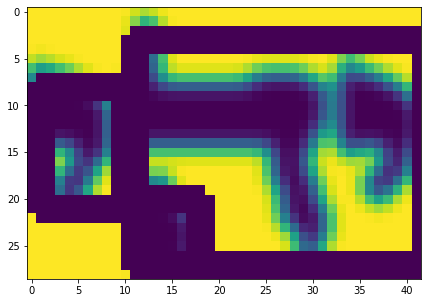

ישי


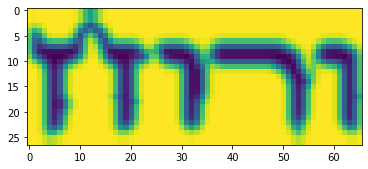

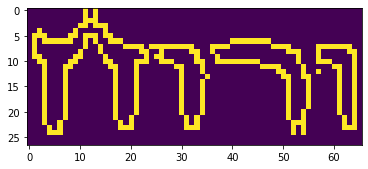

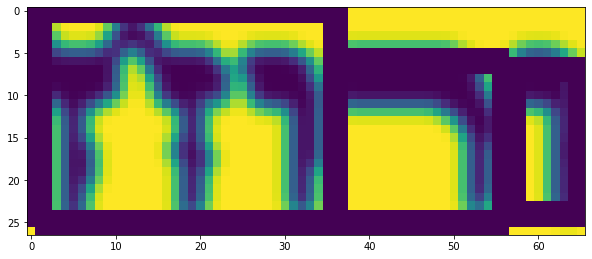

ורא


In [21]:
page_output = []
i = 0
for line in bound_rects_by_line:
  if i > 10:
    break

  predicted_line  = []

  for bound_rect_words in line:
    i+= 1 
    pred_word = []

    char_imgs_out, bound_rects_chars_word = get_chars_from_word(bound_rect_words,
                                                    img_blur_bw, 
                                                    img_blur_bw, 
                                                    english=False, 
                                                    # show_bound_rects_chars=False
                                                    show_bound_rects_chars=True
                                                    )
    plt.show()
    # show_char_imgs(char_imgs_out)
    for img in char_imgs_out[1:]:
      kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
      # img = cv2.erode(img, kernel, iterations=2)
      pred_letter = predict_char(model, idx_to_letter, img, show_img=False)

      pred_word.append(pred_letter)

    pred_word = "".join(pred_word)
    predicted_line.append(pred_word)
    print(pred_word)

  predicted_line = " ".join(predicted_line)
  page_output.append(predicted_line)



In [ ]:
page_output[0]

'ברהאשית ברא אליהים את יהשמים נאתת הארץ'

In [ ]:
point_size = 30
font = ImageFont.truetype('4Q503.ttf', point_size)
i = 1488
char_img = Image.new('RGB', (28, 28), (255, 255, 255))

draw = ImageDraw.Draw(char_img)
draw.text((14,14), chr(i), anchor="mm", font = font, fill = "#000000")
#     plt.imshow(canvas)
#     plt.show(canvas)
#     canvas.show()
char_img
# char_img.save(f"test.png")

  # plt.show()

In [ ]:
img = tf.io.read_file('test.png')
img = tf.image.decode_png(img, channels=3)
# img = tf.image.rgb_to_grayscale(img)
# img = tf.squeeze(img)
# img = tf.cast(img, tf.float32)
# img /= 255.0  # normalize pixels to 0,1

plt.imshow(img)

NotFoundError: ignored

dir(canvas)